In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('imdb_top_1000.csv')

In [143]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
# vilket decennium gjorde morgan freeman flest filmer
# vilket år släpptes flest dramafilmer
# vilka var de fem filmer som fick högst imdb_rating 1990
# vilka är alfredhitchcocks 3 dyraste filmer
# vilka är de 3 längsta filmerna som diane keaton spelat i
# vilken är den genre som har flest kortast filmer
# vilken genre har quentin tarantino gjort flest filmer

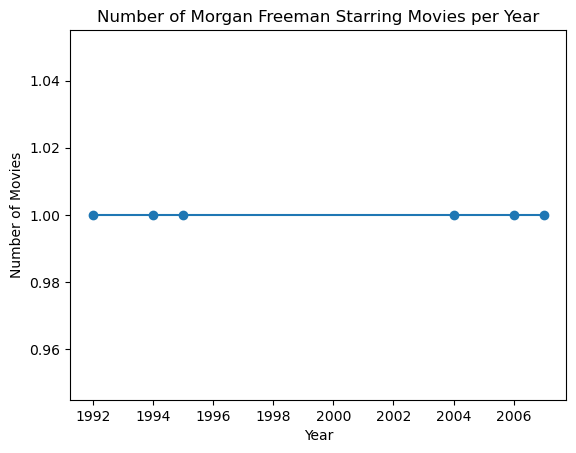

In [145]:
# Which decade did Morgan Freeman star in most movies?

mf = 'Morgan Freeman'

mf_movies = df['Star1'].isin([mf]) | df['Star2'].isin([mf]) | df['Star3'].isin([mf])

all_mf_movies = df[mf_movies]

# Convert 'Released_Year' to datetime and extract the year
df['Released_Year'] = pd.to_datetime(df['Released_Year'], errors='coerce')
df['year'] = df['Released_Year'].dt.year

# Count the number of MF's movies released per year
count_mf_yearly = all_mf_movies.groupby('year')['Released_Year'].count()

# Plot the number of MF's movies released per year
count_mf_yearly.plot(marker='o')
plt.title('Number of Morgan Freeman Starring Movies per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

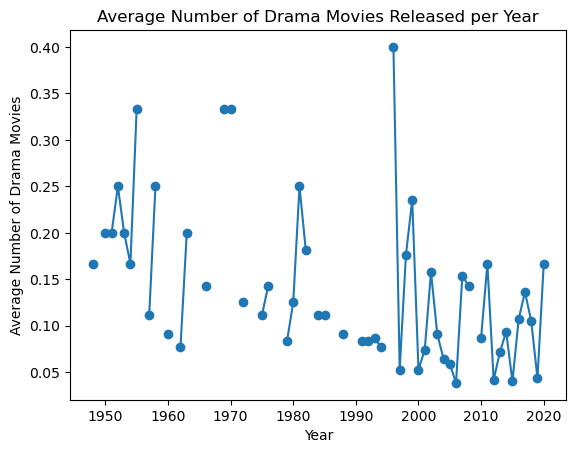

In [53]:
# Which year was most Drama movies released 

# Filter the DataFrame for drama genre
genre_drama = df[df['Genre'] == 'Drama']

# Convert 'Released_Year' to datetime and extract the year
df['Released_Year'] = pd.to_datetime(df['Released_Year'], errors='coerce')
df['year'] = df['Released_Year'].dt.year

# Count the number of drama movies released per year
count_drama_yearly = genre_drama.groupby('year')['Genre'].count()

# Calculate the average number of drama movies per year
avg_drama_yearly = count_drama_yearly / df.groupby('year')['Genre'].count()

# Plot the average number of drama movies released per year
avg_drama_yearly.plot(marker='o')
plt.title('Average Number of Drama Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Average Number of Drama Movies')
plt.show()

In [24]:
dk = 'Diane Keaton'

dk_movies = df['Star1'].isin([dk]) | df['Star2'].isin([dk]) | df['Star3'].isin([dk])

all_dk_movies = df[dk_movies]

count_dk_movies = len(all_dk_movies)

print(count_dk_movies)

4


In [147]:
# Which are the three longest movies Diane Keaton starred in?

dk = 'Diane Keaton'

dk_movies = df['Star1'].isin([dk]) | df['Star2'].isin([dk]) | df['Star3'].isin([dk])

all_dk_movies = df[dk_movies]

# Convert 'Runtime' to numeric data type(float)
all_dk_movies['Runtime'] = pd.to_numeric(all_dk_movies['Runtime'], errors='coerce')

# Group by movie and calculate total length of movies
runtime_dk_movies = all_dk_movies.groupby('Series_Title')['Runtime'].sum()

# Find the three longest movies
dk_three_longest_movies = runtime_dk_movies.head(3)

print(dk_three_longest_movies)

Series_Title
Annie Hall        0.0
Love and Death    0.0
Manhattan         0.0
Name: Runtime, dtype: float64


/var/folders/69/wny3fyjd5d72n1tbyy04wlgh0000gn/T/ipykernel_78720/3946842952.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_dk_movies['Runtime'] = pd.to_numeric(all_dk_movies['Runtime'], errors='coerce')


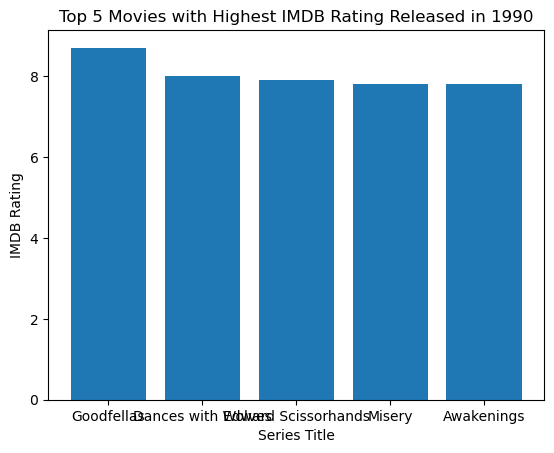

In [124]:
# which are the five movies with highest imdb rating released in 1990

df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Filter movies released in the year 1990 and sort by 'IMDB_Rating' in descending order
sets_year_1990 = df[df['Released_Year'] == 1990][['Series_Title', 'IMDB_Rating', 'Released_Year']].sort_values(by='IMDB_Rating', ascending=False)

top_five_movies = sets_year_1990.head(5)

# Plot the bar chart
plt.bar(top_five_movies['Series_Title'], top_five_movies['IMDB_Rating'])

# Add labels and title
plt.xlabel('Series Title')
plt.ylabel('IMDB Rating')
plt.title('Top 5 Movies with Highest IMDB Rating Released in 1990')

# Show the plot
plt.show()